In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

## Data import and cleaning

#### Import BigPerf data

In [35]:
# Import data
df = pd.read_csv("C:\\Users\\Keir McGlinn-Shaw\\Documents\\Stage-3\\Dissertation\\Data\\Use\\BigPerfMetrics.csv")

df.head()

,Block_ID,HDFS_BW,HDFSTranmissionTime,Mapper_ID,Mapper_VM_MIPS,MapExecutionTime,MapperBW,MapperTransmissionTime,Reducer_ID,Reducer_VM_MIPS,ReducerExecutionTime,ReducerBW,ReducerTransmissionTime,Block_ID.1,Block_BW,BlockTransmissionTime,TransactionTime
0,HDFS_Block_208,11.81,80.63,mapper207,652289,765.49,30.00,2.53,reducer0,341739,480,3.80,250.14,reducer0_Block_1,0.0,0.00,1578.79
1,HDFS_Block_208,11.81,80.63,mapper207,652289,765.49,30.00,2.53,reducer1,150000,120,50.00,18.99,reducer1_Block_1,50.0,20.00,1007.64
2,HDFS_Block_208,11.81,80.63,mapper207,652289,765.49,16.76,3.25,reducer2,382530,480,4.48,212.22,reducer2_Block_1,3.7,270.02,1811.61
3,HDFS_Block_208,11.81,80.63,mapper207,652289,765.49,16.76,3.25,reducer3,150000,120,5.88,161.57,reducer3_Block_1,3.7,270.02,1400.96
4,HDFS_Block_208,11.81,80.63,mapper207,652289,765.49,18.41,4.16,reducer4,457419,480,5.88,161.53,reducer4_Block_1,3.7,270.02,1761.83


#### Clean data of unwanted variables and missing values

In [36]:
# Clean data
df.dropna()

df.drop(labels=['Block_ID', 'Mapper_ID', 'Reducer_ID', 'Block_ID.1'], axis=1, inplace=True)

df.head()

,HDFS_BW,HDFSTranmissionTime,Mapper_VM_MIPS,MapExecutionTime,MapperBW,MapperTransmissionTime,Reducer_VM_MIPS,ReducerExecutionTime,ReducerBW,ReducerTransmissionTime,Block_BW,BlockTransmissionTime,TransactionTime
0,11.81,80.63,652289,765.49,30.00,2.53,341739,480,3.80,250.14,0.0,0.00,1578.79
1,11.81,80.63,652289,765.49,30.00,2.53,150000,120,50.00,18.99,50.0,20.00,1007.64
2,11.81,80.63,652289,765.49,16.76,3.25,382530,480,4.48,212.22,3.7,270.02,1811.61
3,11.81,80.63,652289,765.49,16.76,3.25,150000,120,5.88,161.57,3.7,270.02,1400.96
4,11.81,80.63,652289,765.49,18.41,4.16,457419,480,5.88,161.53,3.7,270.02,1761.83


#### Rename columns to better fit in drawn charts and for ease of use

In [37]:
# Rename column headers to abbreviations

nodes = ['HBW', 'HTT', 'MMIPS', 'MET', 'MBW', 'MTT', 'RMIPS', 'RET', 'RBW', 'RTT', 'BBW', 'BTT', 'TT']

df.columns = nodes

df.head(10)

,HBW,HTT,MMIPS,MET,MBW,MTT,RMIPS,RET,RBW,RTT,BBW,BTT,TT
0,11.81,80.63,652289,765.49,30.00,2.53,341739,480,3.80,250.14,0.0,0.00,1578.79
1,11.81,80.63,652289,765.49,30.00,2.53,150000,120,50.00,18.99,50.0,20.00,1007.64
2,11.81,80.63,652289,765.49,16.76,3.25,382530,480,4.48,212.22,3.7,270.02,1811.61
3,11.81,80.63,652289,765.49,16.76,3.25,150000,120,5.88,161.57,3.7,270.02,1400.96
4,11.81,80.63,652289,765.49,18.41,4.16,457419,480,5.88,161.53,3.7,270.02,1761.83
5,11.81,80.63,652289,765.49,18.41,4.16,150000,120,6.98,136.24,3.7,270.02,1376.54
6,11.81,80.63,652289,765.49,18.41,4.16,563904,480,3.80,250.14,3.7,270.02,1850.44
7,11.81,80.63,652289,765.49,18.41,4.16,150000,120,150.00,6.33,3.7,270.02,1246.63
8,11.81,80.63,652289,765.49,18.41,4.16,430890,480,3.80,250.14,3.7,270.02,1850.44
9,11.81,80.63,652289,765.49,18.41,4.16,150000,120,150.00,6.33,3.7,270.02,1246.63


<AxesSubplot:ylabel='Frequency'>

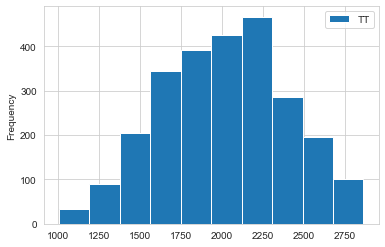

In [38]:
sns.set_style('whitegrid')


#new_df = df.groupby('TT')['TT'].sum().reset_index()
# for column in df:
#     df[column].plot(kind='hist', xlabel=f'{column} values')

#df['TT'].plot(kind='hist')
df['TT'].plot(kind='hist', xlabel='TT values', legend=True)


<AxesSubplot:ylabel='Frequency'>

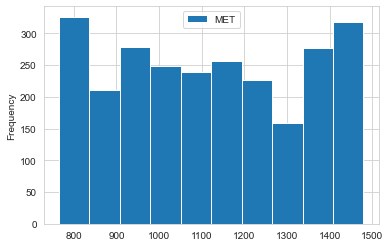

In [39]:
df['MET'].plot(kind='hist', xlabel='MET values', legend=True)

<AxesSubplot:ylabel='Frequency'>

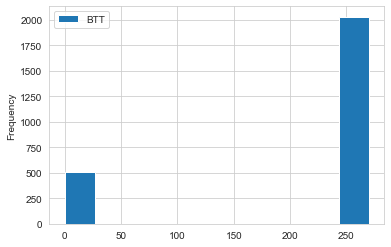

In [40]:
df['BTT'].plot(kind='hist', xlabel='BTT values', legend=True)

<AxesSubplot:ylabel='Frequency'>

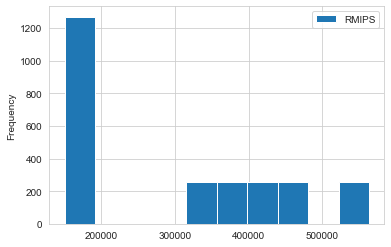

In [41]:
df['RMIPS'].plot(kind='hist', xlabel='RMIPS values', legend=True)

In [42]:
'''
Splits data into three bins of equal size using: https://pandas.pydata.org/docs/reference/api/pandas.cut.html
'''
def split_tertiles(df):
    tertile_labels = ['Very Low', 'Low', 'High', 'Very-high']

    tert_df = pd.DataFrame()

    for column_name in df:
        tert_df[column_name] = pd.cut(df[column_name], 4, labels=tertile_labels, ordered=True)

    # Change type of values stored in dataframe to avoid errors arrising from using the Category type when the dataframe is fed into the pgmpy.metrics.metrics correlation_score function
    tert_df = tert_df.astype('object')

    return tert_df

In [43]:
cat_df = split_tertiles(df)

for column in cat_df:
    print(cat_df.groupby(column)[column].count().reset_index(name='Count').to_dict(orient='records'))

[{'HBW': 'Very Low', 'Count': 1122}, {'HBW': 'Very-high', 'Count': 1418}]
[{'HTT': 'Very Low', 'Count': 1436}, {'HTT': 'Very-high', 'Count': 1104}]
[{'MMIPS': 'High', 'Count': 533}, {'MMIPS': 'Low', 'Count': 628}, {'MMIPS': 'Very Low', 'Count': 675}, {'MMIPS': 'Very-high', 'Count': 704}]
[{'MET': 'High', 'Count': 533}, {'MET': 'Low', 'Count': 628}, {'MET': 'Very Low', 'Count': 675}, {'MET': 'Very-high', 'Count': 704}]
[{'MBW': 'High', 'Count': 114}, {'MBW': 'Low', 'Count': 52}, {'MBW': 'Very Low', 'Count': 2137}, {'MBW': 'Very-high', 'Count': 237}]
[{'MTT': 'High', 'Count': 728}, {'MTT': 'Low', 'Count': 237}, {'MTT': 'Very Low', 'Count': 503}, {'MTT': 'Very-high', 'Count': 1072}]
[{'RMIPS': 'High', 'Count': 762}, {'RMIPS': 'Low', 'Count': 254}, {'RMIPS': 'Very Low', 'Count': 1270}, {'RMIPS': 'Very-high', 'Count': 254}]
[{'RET': 'Very Low', 'Count': 1270}, {'RET': 'Very-high', 'Count': 1270}]
[{'RBW': 'Low', 'Count': 254}, {'RBW': 'Very Low', 'Count': 1778}, {'RBW': 'Very-high', 'Count'

In [44]:
for column in df:
    print(df[column].describe())